pip install matplotlib
pip install pandas
pip install geopy
pip install ephem

In [1]:
import angles as a
from datetime import date, time, datetime, timedelta
import pandas as pd
import itertools

In [2]:
o = a.observer()
columns = ['date_time', 'date', 'time', 'altitude', 'azimuth', 'south', 'west']
def slap(flea):
    if flea == 1:
        count, table = a.compute_table(o, date(2024,11,23),date(2025,11,22),time(5,0,0),time(21,0,0))
        a.print_table(o, count, table)
    if flea == 2:
        args = [[34, 0, 25, 0],[68,180,25,0],[34, 90, 25, 90],[68,270,25,90],[34, 180, 25, 180],[68,0,25,180]]
        print([a.compute_surface_incident_angle(*arg) for arg in args] == [9.0, 93.0, 9.0, 93.0, 9.0, 93.0])
    if flea == 3:
        angles = a.compute_angles_for_time_window(o, date(2020,6,21),date(2020,6,21),time(13,0,0),time(14,0,0),minutes=1)
        data = pd.DataFrame(angles, columns=columns)
        print(data.head(100))
        print(data.size)
    if flea == 4:
        angles = a.compute_angles(o, datetime(2020,6,21,10), datetime(2020,6,21,14), minutes=5)
        data = pd.DataFrame(angles, columns=columns)
        print(data.head(100))
    if flea == 5:
        angles = a.compute_angles_for_time_window(o, date(2020,1,21),date(2020,1,21),time(13,0,0),time(14,0,0),minutes=1,incline=46)
        data = pd.DataFrame(angles, columns=columns)
        print(data[['south', 'west']].sum())
  

In [3]:
for flea in [1]:
    print('+++++++++++++++++')
    print('flea:', flea)
    print('+++++++++++++++++')
    slap(flea)

+++++++++++++++++
flea: 1
+++++++++++++++++
location: 2827 SE 49th Avenue, Portland, Oregon, US lon: -122:36:44.4 lat: 45:30:07.6
count: 2551
python version:  3.9.0 (v3.9.0:9cf6752276, Oct  5 2020, 11:29:23) 
[Clang 6.0 (clang-600.0.57)]
2024-11-23	05:30	-30°	E
2024-11-23	08:21	RISE	119°
2024-11-23	09:45	11°	SE
2024-11-23	12:56	24°	S
2024-11-23	16:08	11°	SW
2024-11-23	17:29	SET	240°
2024-11-23	20:23	-29°	W
2024-11-24	05:29	-30°	E
2024-11-24	08:22	RISE	119°
2024-11-24	09:44	11°	SE
2024-11-24	12:57	24°	S
2024-11-24	16:08	11°	SW
2024-11-24	17:28	SET	240°
2024-11-24	20:24	-30°	W
2024-11-25	05:28	-30°	E
2024-11-25	08:24	RISE	120°
2024-11-25	09:44	10°	SE
2024-11-25	12:57	24°	S
2024-11-25	16:09	11°	SW
2024-11-25	17:28	SET	240°
2024-11-25	20:25	-30°	W
2024-11-26	05:28	-30°	E
2024-11-26	08:25	RISE	120°
2024-11-26	09:44	10°	SE
2024-11-26	12:57	23°	S
2024-11-26	16:10	10°	SW
2024-11-26	17:27	SET	239°
2024-11-26	20:27	-30°	W
2024-11-27	05:27	-31°	E
2024-11-27	08:26	RISE	120°
2024-11-27	09:44	10°	SE

In [4]:
year = a.current_year()
d1 = a.winter_solstice(year-1)
d2 = a.winter_solstice(year)
t1 = time(5,20,0)
t2 = time(21,0,0)
minutes = 5

<AxesSubplot:xlabel='time'>

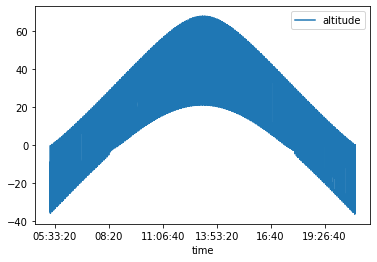

In [5]:
angles = a.compute_angles_for_time_window(o, d1,d2,t1,t2,minutes=minutes,incline=25)
data = pd.DataFrame(angles, columns=columns)
data['total'] = data['south'] + .9 * data['west']
data[['time','altitude']].plot(x='time')

In [6]:
angles = a.compute_angles_for_time_window(o, d1,d2,t1,t2,minutes=minutes,incline=45)
data = pd.DataFrame(angles, columns=columns)
data['total'] = data['south'] + .9 * data['west']
print(data[['south', 'west', 'total']].sum())

south    2.425700e+06
west     1.764685e+06
total    4.013916e+06
dtype: float64


In [7]:
angles = a.compute_angles_for_time_window(o, d1,d2,t1,t2,minutes=minutes,incline=65)
data = pd.DataFrame(angles, columns=columns)
data['total'] = data['south'] + .9 * data['west']
print(data[['south', 'west', 'total']].sum())

south    2.843876e+06
west     1.991578e+06
total    4.636296e+06
dtype: float64


In [8]:
dt = a.today()
t1 = time(5,20,0)
t2 = time(21,0,0)
count, table = a.compute_table(o, dt, dt, t1, t2)
assert count == 7
for x in table:
    print(x)

['2024-11-23', '05:30', '-30°', 'E']
['2024-11-23', '08:21', 'RISE', '119°']
['2024-11-23', '09:45', '11°', 'SE']
['2024-11-23', '12:56', '24°', 'S']
['2024-11-23', '16:08', '11°', 'SW']
['2024-11-23', '17:29', 'SET', '240°']
['2024-11-23', '20:23', '-29°', 'W']


In [9]:
dt = a.vernal_equinox()
t1 = time(5,20,0)
t2 = time(21,0,0)
count, table = a.compute_table(o, dt, dt, t1, t2)
assert count == 7
for x in table:
    print(x)

['2024-03-21', '07:10', 'RISE', '88°']
['2024-03-21', '07:19', '1°', 'E']
['2024-03-21', '10:56', '35°', 'SE']
['2024-03-21', '13:17', '45°', 'S']
['2024-03-21', '15:37', '36°', 'SW']
['2024-03-21', '19:13', '2°', 'W']
['2024-03-21', '19:22', 'SET', '271°']


In [10]:
dt = a.summer_solstice(a.current_year())
t1 = time(5,20,0)
t2 = time(21,0,0)
count, table = a.compute_table(o, dt, dt, t1, t2)
assert count == 7
for x in table:
    print(x)

['2024-06-21', '05:22', 'RISE', '54°']
['2024-06-21', '08:52', '34°', 'E']
['2024-06-21', '11:47', '62°', 'SE']
['2024-06-21', '13:12', '68°', 'S']
['2024-06-21', '14:37', '62°', 'SW']
['2024-06-21', '17:30', '34°', 'W']
['2024-06-21', '20:59', 'SET', '305°']


In [11]:
dt = a.autumnal_equinox()
t1 = time(5,20,0)
t2 = time(21,0,0)
count, table = a.compute_table(o, dt, dt, t1, t2)
assert count == 7
for x in table:
    print(x)

['2024-09-21', '06:57', 'RISE', '89°']
['2024-09-21', '07:04', '1°', 'E']
['2024-09-21', '10:41', '35°', 'SE']
['2024-09-21', '13:03', '45°', 'S']
['2024-09-21', '15:24', '35°', 'SW']
['2024-09-21', '19:01', '1°', 'W']
['2024-09-21', '19:05', 'SET', '270°']


In [12]:
dt = a.winter_solstice(a.current_year())
t1 = time(5,20,0)
t2 = time(21,0,0)
count, table = a.compute_table(o, dt, dt, t1, t2)
assert count == 7
for x in table:
    print(x)

['2024-12-21', '05:27', '-34°', 'E']
['2024-12-21', '08:48', 'RISE', '124°']
['2024-12-21', '09:49', '8°', 'SE']
['2024-12-21', '13:08', '21°', 'S']
['2024-12-21', '16:27', '8°', 'SW']
['2024-12-21', '17:26', 'SET', '236°']
['2024-12-21', '20:49', '-34°', 'W']
